
# OTA_HotelInvCountNotifRQ

Analysis is done on basis of 14th files that were processed at 1st of December 2021.


## Import the relevant libraries

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

## Load all parquet files that were available with that message

In [2]:
HotelInvCountNotifRQ_Messages = pd.read_parquet("Documents/ugo_inv_count", engine='auto')
HotelInvCountNotifRQ_Messages

,HotelInvCountNotifRQ_Messages
0,[{'MessageMeta': {'X-Correlation-ID': 'f114ed8...
1,[{'MessageMeta': {'X-Correlation-ID': '8c8c3f1...
2,[{'MessageMeta': {'X-Correlation-ID': '3e1ffce...
3,[{'MessageMeta': {'X-Correlation-ID': '78a52c9...
4,[{'MessageMeta': {'X-Correlation-ID': '17ad39d...
5,[{'MessageMeta': {'X-Correlation-ID': 'eb52ea1...
6,[{'MessageMeta': {'X-Correlation-ID': 'f00b0b3...
7,[{'MessageMeta': {'X-Correlation-ID': 'a3ad5bc...
8,[{'MessageMeta': {'X-Correlation-ID': 'deb605c...
9,[{'MessageMeta': {'X-Correlation-ID': '2558875...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [3]:
firstLevel = []
for index, level in HotelInvCountNotifRQ_Messages.iterrows():
    firstLevel.extend(HotelInvCountNotifRQ_Messages.iloc[index,0])

### Resolving all levels of nesting<hr>

In [4]:
import ast
import re

def resolveNestedArray(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def isDict(vvalue):
    if re.search("\{",str(vvalue)):
        return True
    else:
        return False
    
    
def unnestFile(li, key_level=""):
    listOfUnnested = []
    for level in li:
        row_data = None
        level1 = {}
        for key, value in level.items():
            if isinstance(value, np.ndarray):
                row_data = unnestFile(value, key+"_")
            elif isinstance(value, str)&isDict(value):
                level1[key_level+"_"+ key] = ast.literal_eval(value)   
            elif isinstance(value, dict):
                level1.update(value)
            elif isinstance(value, list):
                for l in value:
                    if isinstance(l, dict):
                       level1.update(l) 
            else:
                level1[key_level+key] = value

        if row_data is not None:
            newDi = resolveNestedArray(level1, row_data)
            listOfUnnested.extend(newDi)
        else:
            listOfUnnested.append(level1)
    return listOfUnnested


def prepareForDF(firstLevel):
    levelTemp = unnestFile(firstLevel)
    while any(isinstance(n, dict) for n in levelTemp[0].values())|any(isinstance(m, np.ndarray) for m in levelTemp[0].values())|any(isinstance(l, list) for l in levelTemp[0].values()):
        newL = unnestFile(levelTemp)
        levelTemp = newL
    return levelTemp              

final = prepareForDF(firstLevel)

### Creating DataFrame<hr>

In [5]:
finalData_raw = pd.DataFrame(final)
finalData_raw

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,POS,HotelCode,...,Mon,Tue,Weds,Thur,Fri,Sat,Sun,InvCount_Count,InvCount_CountType,InvCount_OriginalData
0,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
1,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
2,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
3,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
4,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,468352c0-4f63-41a9-bef4-e55b81d499ae,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
2098,468352c0-4f63-41a9-bef4-e55b81d499ae,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
2099,468352c0-4f63-41a9-bef4-e55b81d499ae,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
2100,468352c0-4f63-41a9-bef4-e55b81d499ae,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,


### Adding column with difference between Start and End date

In [6]:
HotelInvCountNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [7]:
HotelInvCountNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   X-Correlation-ID       2102 non-null   object
 1   Type                   2102 non-null   object
 2   AppId                  2102 non-null   object
 3   PrimaryLangID          0 non-null      object
 4   EchoToken              2102 non-null   object
 5   TimeStamp              0 non-null      object
 6   Version                0 non-null      object
 7   Target                 0 non-null      object
 8   POS                    0 non-null      object
 9   HotelCode              2102 non-null   object
 10  ChainCode              0 non-null      object
 11  HotelName              0 non-null      object
 12  InvTypeCode            2102 non-null   object
 13  RatePlanCode           1956 non-null   object
 14  Start                  2102 non-null   object
 15  End                  

In [8]:
HotelInvCountNotifRQ.head(10)

,X-Correlation-ID,Type,AppId,PrimaryLangID,EchoToken,TimeStamp,Version,Target,POS,HotelCode,...,Mon,Tue,Weds,Thur,Fri,Sat,Sun,InvCount_Count,InvCount_CountType,InvCount_OriginalData
0,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
1,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
2,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
3,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
4,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
5,f114ed88-3f2b-4d35-8257-0f6603811125,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,24,2,
6,4567e49f-195c-4924-922a-6afb530ec03b,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,10,2,
7,4567e49f-195c-4924-922a-6afb530ec03b,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,10,2,
8,8c8c3f1c-e575-4692-8700-ff2bc6ad5a99,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,11,2,
9,aaa6cc15-09c0-4c15-aad8-f2a441d588f2,OTA_HotelInvCountNotifRQ,synxis,None,,None,None,None,None,62942,...,None,None,None,None,None,None,None,9,2,


### Basic statistic for data<hr>

In [9]:
HotelInvCountNotifRQ.describe(include="all").transpose()

,count,unique,top,freq
X-Correlation-ID,2102,653,87c96598-2d88-40e4-b3a8-7f697258564f,16
Type,2102,1,OTA_HotelInvCountNotifRQ,2102
AppId,2102,2,synxis,1956
PrimaryLangID,0,0,NaN,NaN
EchoToken,2102,1,,2102
TimeStamp,0,0,NaN,NaN
Version,0,0,NaN,NaN
Target,0,0,NaN,NaN
POS,0,0,NaN,NaN
HotelCode,2102,2,62942,1956


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [10]:
HotelInvCountNotifRQ = HotelInvCountNotifRQ.drop(columns=["PrimaryLangID","TimeStamp","Version","Target","Target","POS","ChainCode","HotelName"])

In [11]:
HotelInvCountNotifRQ.describe(include="all").transpose()

,count,unique,top,freq
X-Correlation-ID,2102,653,87c96598-2d88-40e4-b3a8-7f697258564f,16
Type,2102,1,OTA_HotelInvCountNotifRQ,2102
AppId,2102,2,synxis,1956
EchoToken,2102,1,,2102
HotelCode,2102,2,62942,1956
InvTypeCode,2102,4,LGPV,1216
RatePlanCode,1956,1,,1956
Start,2102,142,2021-12-03,73
End,2102,151,2021-12-03,66
Mon,23,1,true,23


#### Checking null values for hotelCode

In [12]:
HotelInvCountNotifRQ.HotelCode.isna().sum()

0

#### Checking unique values for hotelCode

In [13]:
HotelInvCountNotifRQ.HotelCode.unique()

array(['62942', '30020'], dtype=object)

#### Creating sub DataFrames for each hotel to check statisctics per hotel

In [14]:
hotel30020 = HotelInvCountNotifRQ.loc[HotelInvCountNotifRQ.HotelCode=='30020']
hotel62942 = HotelInvCountNotifRQ.loc[HotelInvCountNotifRQ.HotelCode=='62942']

#### Base statistics for each hotel

In [15]:
hotel30020.describe(include='all').transpose()

,count,unique,top,freq
X-Correlation-ID,146,146,804d2f4b-8c44-4cf2-951c-7849fef435b0,1
Type,146,1,OTA_HotelInvCountNotifRQ,146
AppId,146,1,smarthotel,146
EchoToken,146,1,,146
HotelCode,146,1,30020,146
InvTypeCode,146,1,56128,146
RatePlanCode,0,0,NaN,NaN
Start,146,28,2021-11-03,13
End,146,29,2021-11-06,14
Mon,23,1,true,23


In [16]:
hotel62942.describe(include="all").transpose()

,count,unique,top,freq
X-Correlation-ID,1956,507,5c82be0c-dc90-4a4f-8340-66c375e6200a,16
Type,1956,1,OTA_HotelInvCountNotifRQ,1956
AppId,1956,1,synxis,1956
EchoToken,1956,1,,1956
HotelCode,1956,1,62942,1956
InvTypeCode,1956,3,LGPV,1216
RatePlanCode,1956,1,,1956
Start,1956,138,2022-01-05,68
End,1956,145,2022-01-05,64
Mon,0,0,NaN,NaN


#### Checking null values for AppId

In [17]:
HotelInvCountNotifRQ.AppId.isna().sum()

0

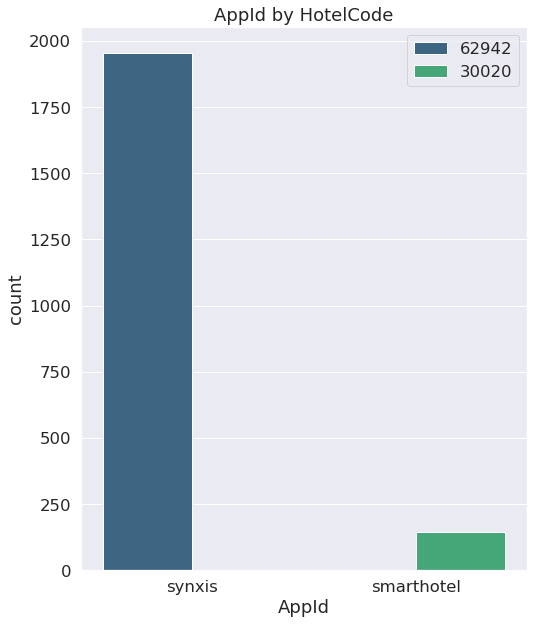

In [18]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(8,10)})
sns.countplot(x = HotelInvCountNotifRQ.AppId, hue = HotelInvCountNotifRQ.HotelCode, data = HotelInvCountNotifRQ, palette = 'viridis')
plt.legend(loc="upper right")
plt.title("AppId by HotelCode")
plt.show()

#### Checking for null values for InvTypeCode column

In [19]:
HotelInvCountNotifRQ.InvTypeCode.isna().sum()

0

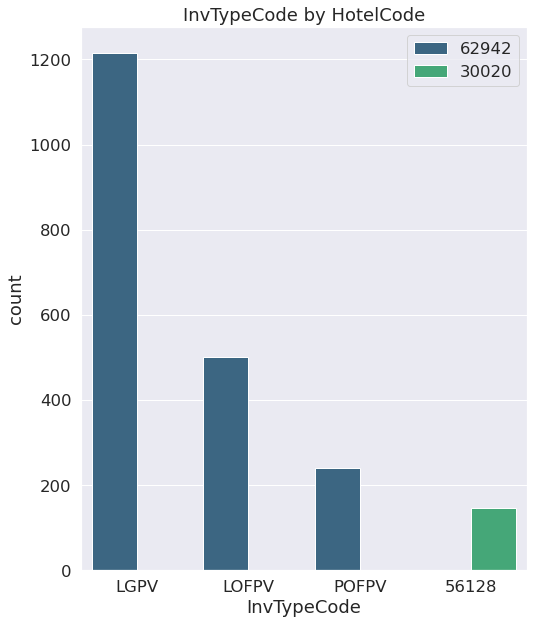

In [20]:
sns.set(font_scale = 1.5,rc={"figure.figsize":(8,10)})
sns.countplot(x = HotelInvCountNotifRQ.InvTypeCode, hue = HotelInvCountNotifRQ.HotelCode, data = HotelInvCountNotifRQ, palette = 'viridis')
plt.legend(loc="upper right")
plt.title('InvTypeCode by HotelCode')
plt.show()

#### Checking against null values for InvCount_Count

In [21]:
HotelInvCountNotifRQ.InvCount_Count.isna().sum()

0

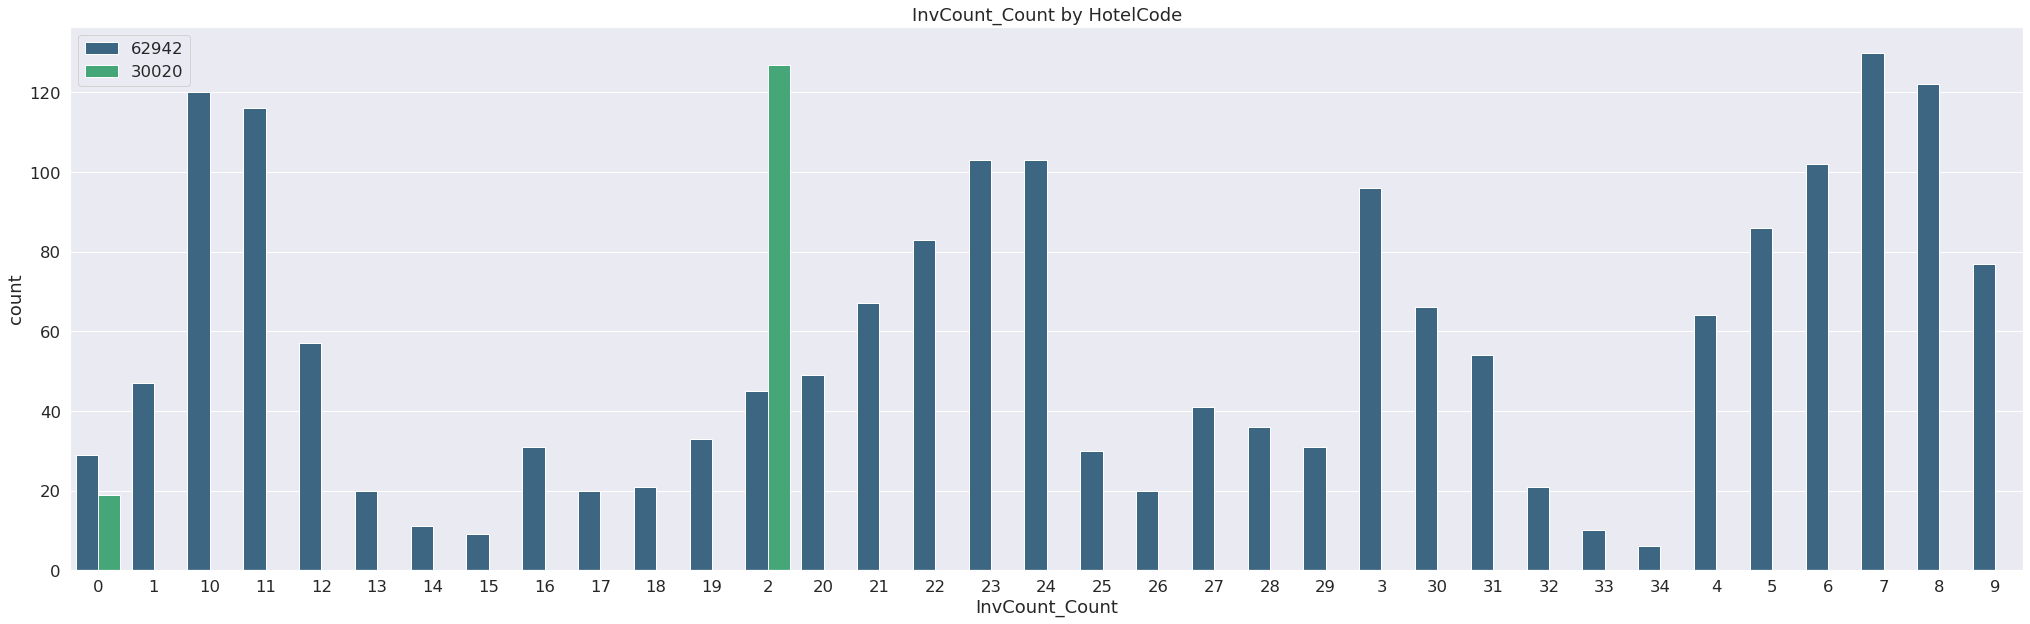

In [22]:
plt.figure(figsize=(35,10))
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,15)})
sns.countplot(x = HotelInvCountNotifRQ.InvCount_Count.sort_values(), hue = HotelInvCountNotifRQ.HotelCode, data = HotelInvCountNotifRQ, palette = 'viridis')
plt.legend(loc="upper left")
plt.title('InvCount_Count by HotelCode')
plt.show()

#### Checking against null values for InvCount_CountType

In [23]:
HotelInvCountNotifRQ.InvCount_CountType.isna().sum()

0

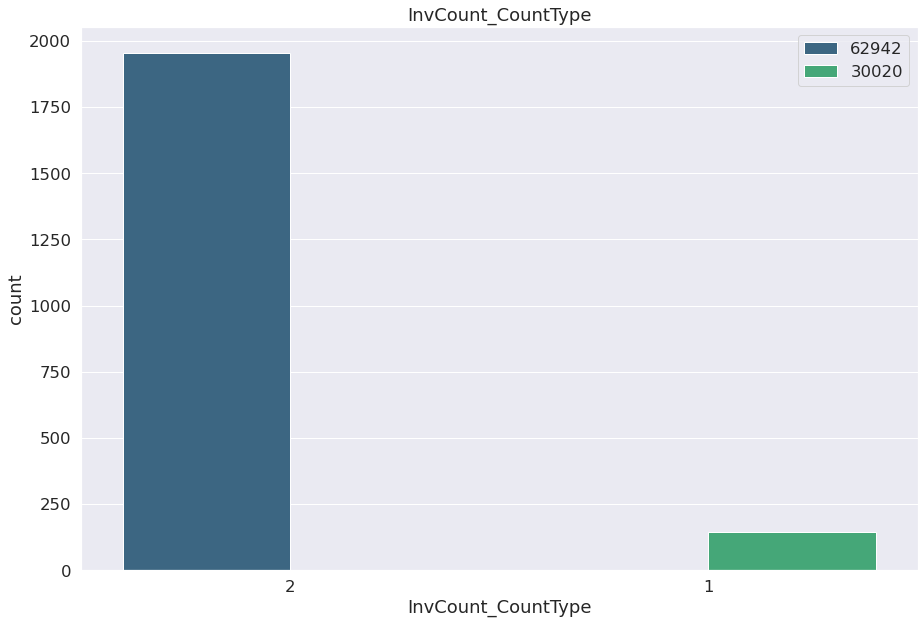

In [24]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5,rc={"figure.figsize":(15,15)})
sns.countplot(x = HotelInvCountNotifRQ.InvCount_CountType, hue = HotelInvCountNotifRQ.HotelCode, data = HotelInvCountNotifRQ, palette = 'viridis')
plt.legend(loc="upper right")
plt.title('InvCount_CountType')
plt.show()

#### Checking against null values Start

In [25]:
HotelInvCountNotifRQ.Start.isna().sum()

0

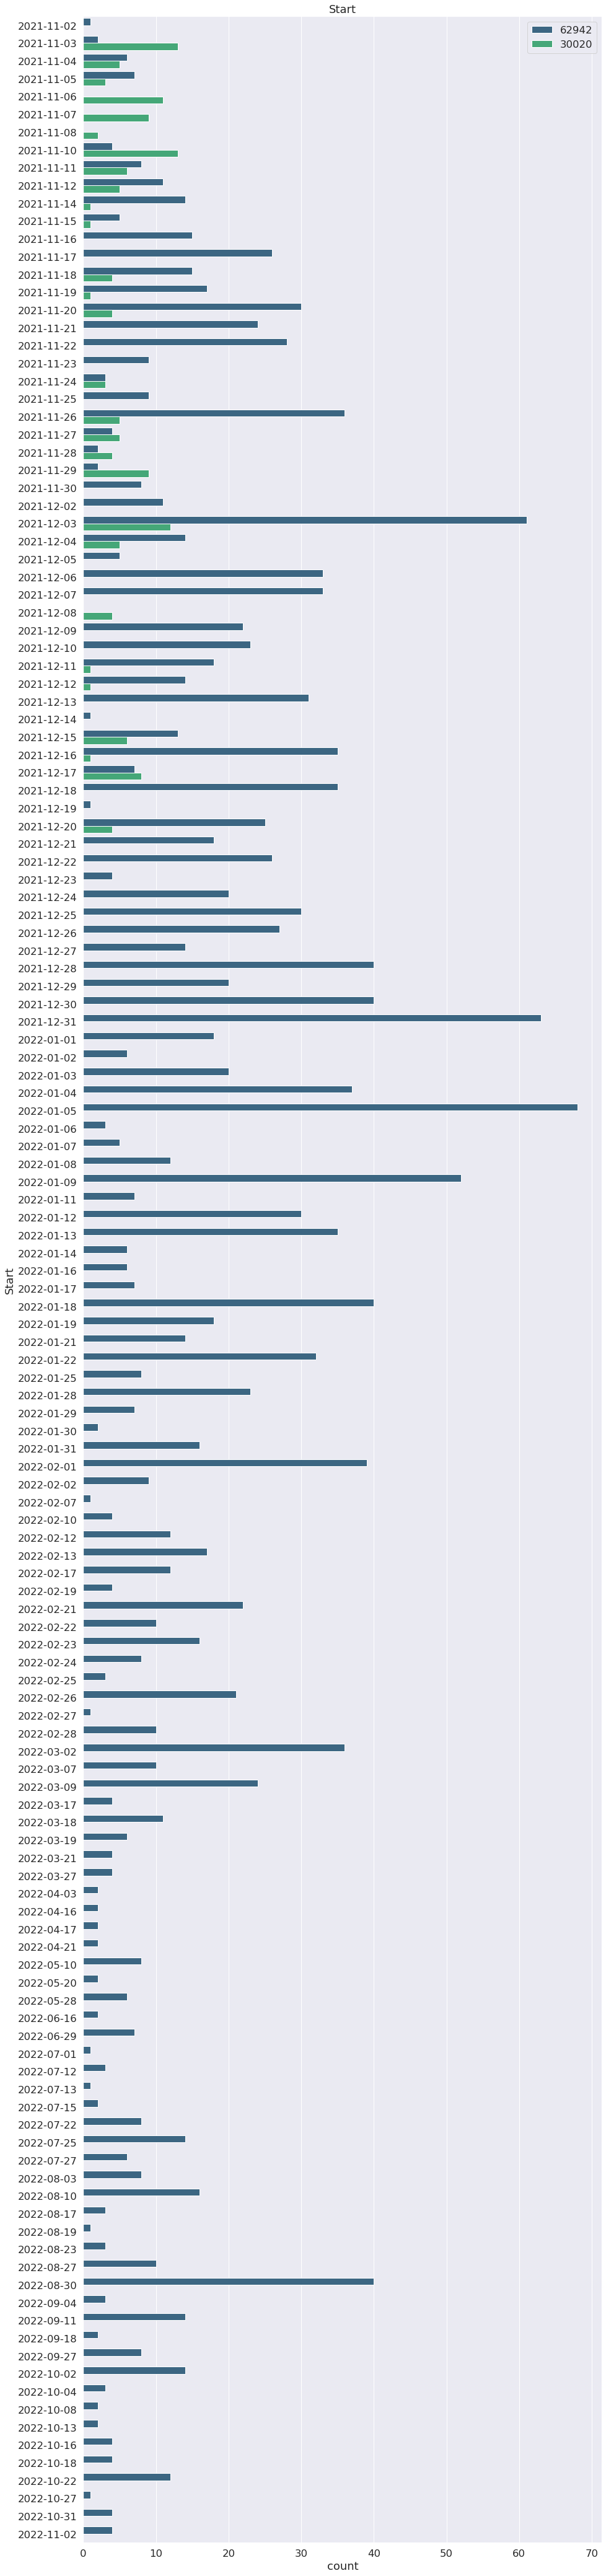

In [30]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,75)})
sns.countplot(y = HotelInvCountNotifRQ.Start.sort_values(), hue = HotelInvCountNotifRQ.HotelCode, data = HotelInvCountNotifRQ, palette = 'viridis')
plt.legend(loc="upper right")
plt.title('Start')
plt.show()

#### Checking against null values for End

In [27]:
HotelInvCountNotifRQ.End.isna().sum()

0

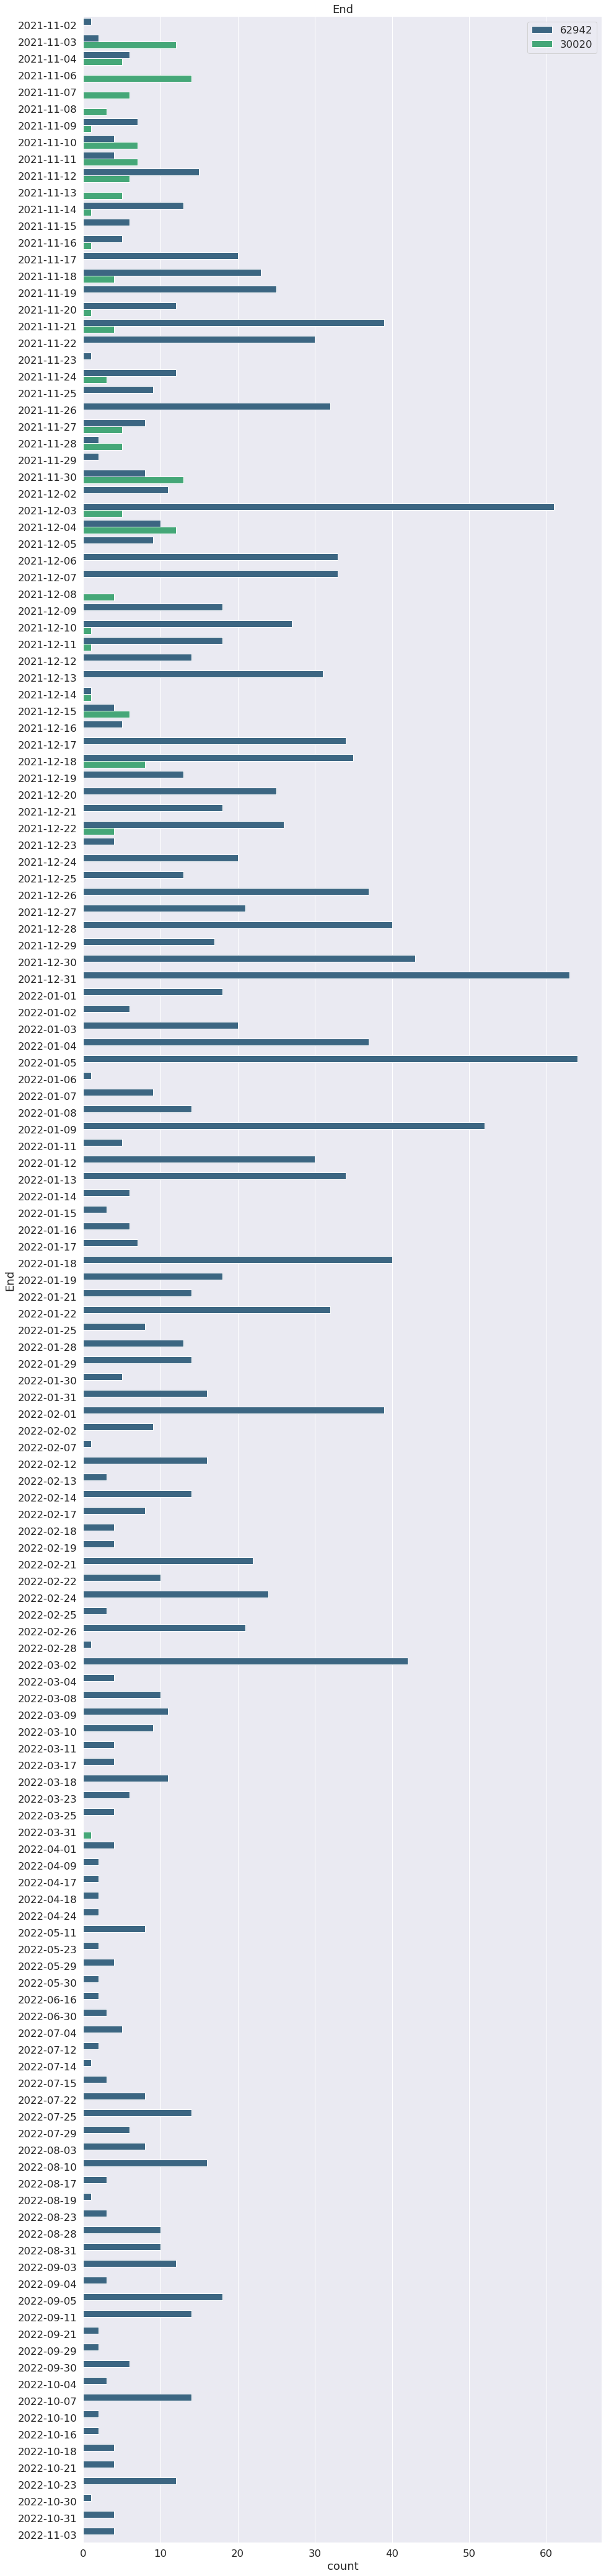

In [29]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,75)})
sns.countplot(y = HotelInvCountNotifRQ.End.sort_values(), hue = HotelInvCountNotifRQ.HotelCode, data = HotelInvCountNotifRQ, palette = 'viridis')
plt.legend(loc="upper right")
plt.title('End')
plt.show()

#### Strat over Time

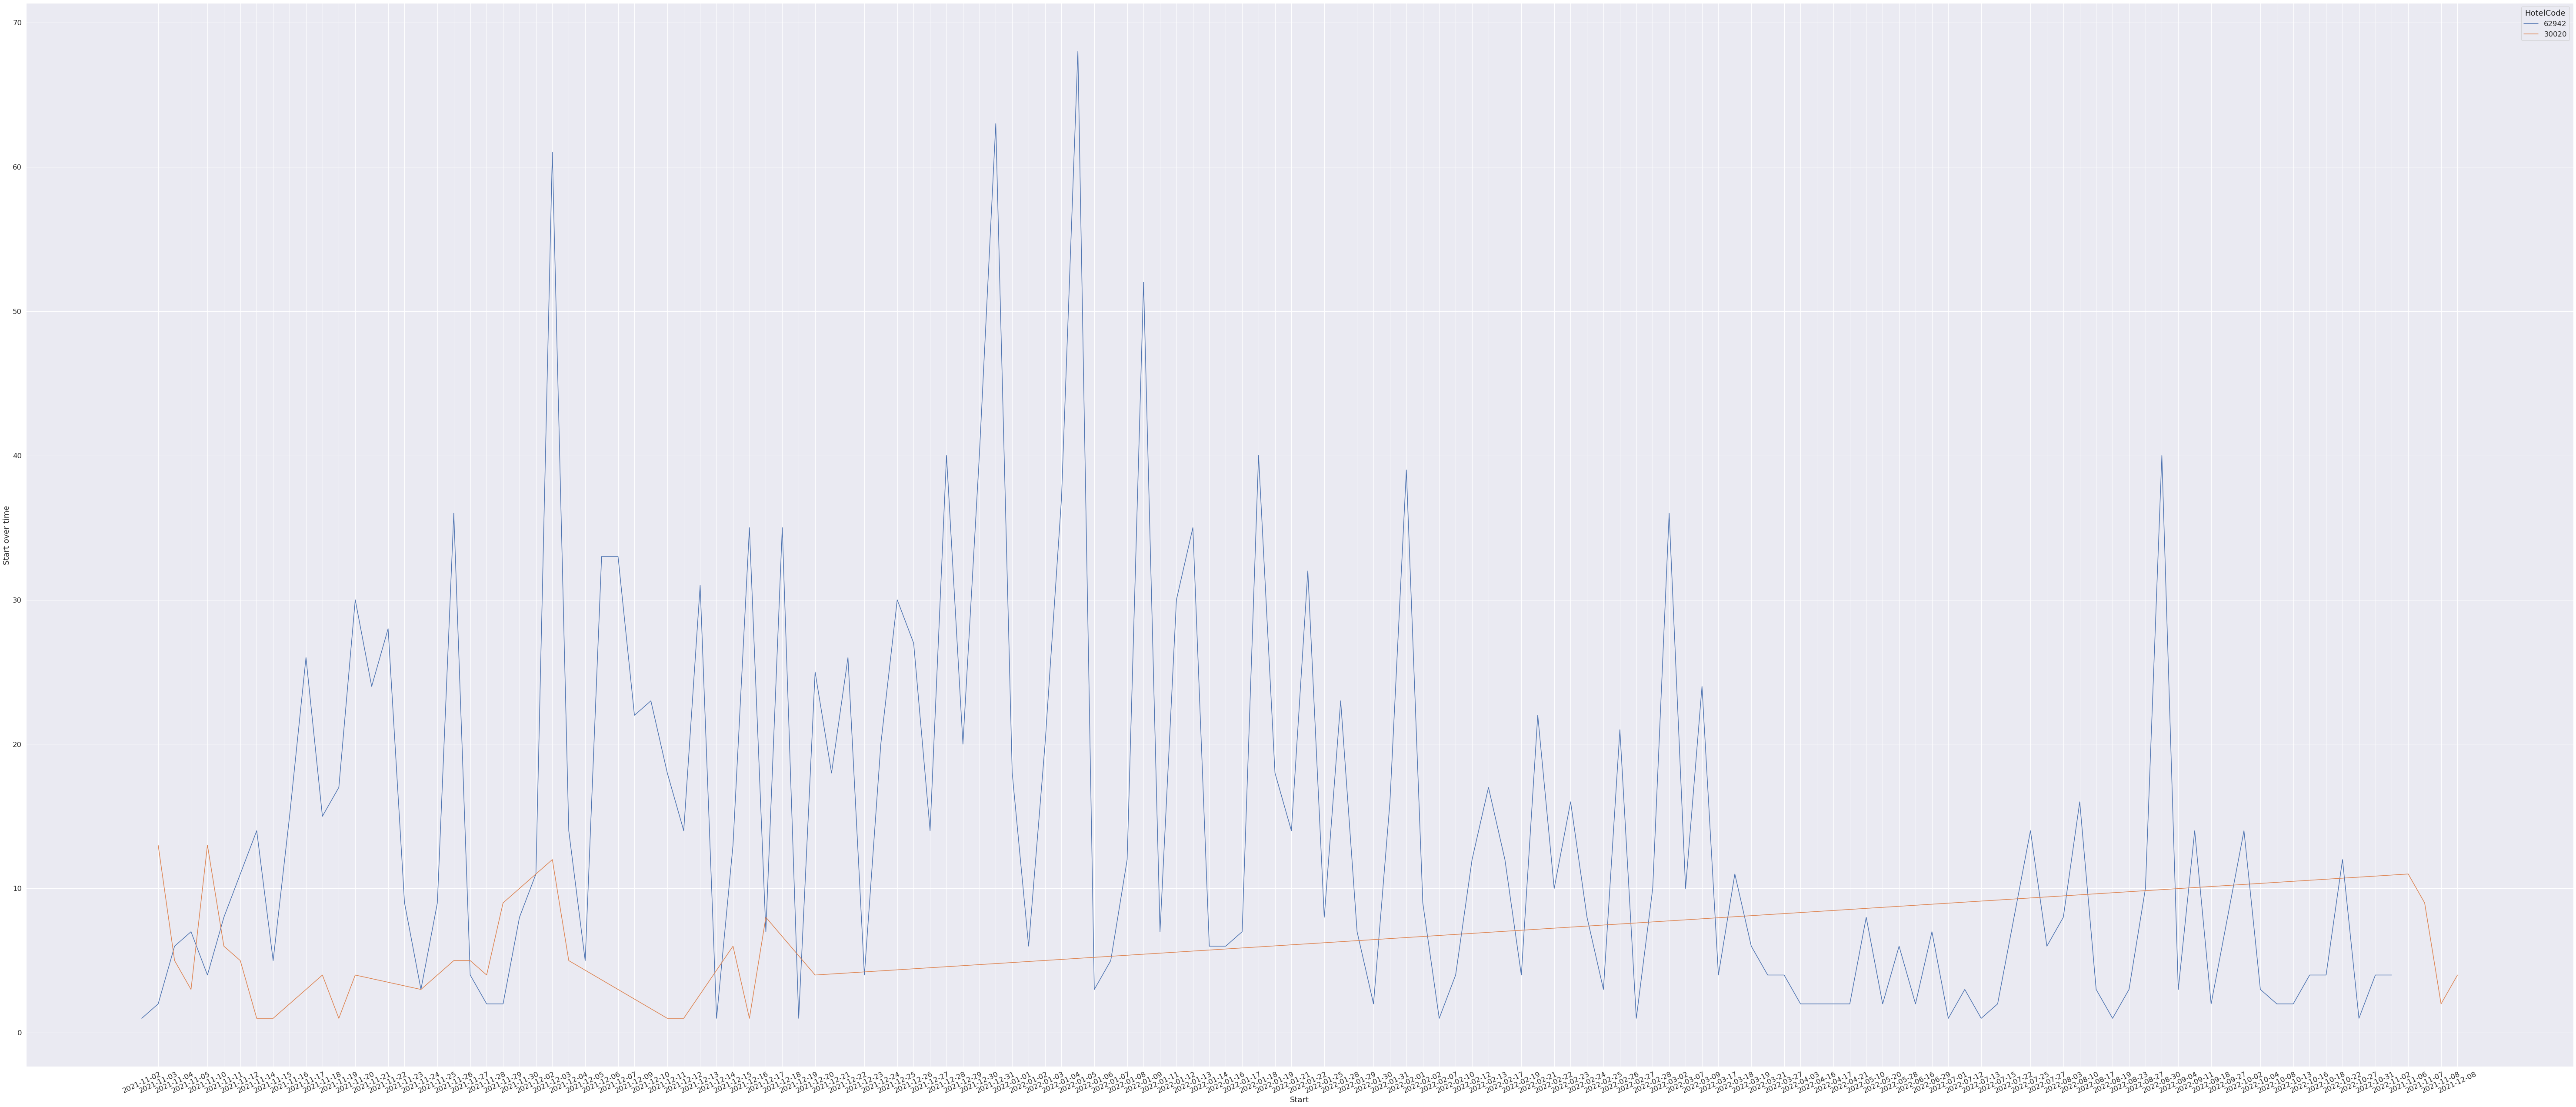

In [33]:
hc1 = HotelInvCountNotifRQ.loc[HotelInvCountNotifRQ.HotelCode == "62942"]
hc2 = HotelInvCountNotifRQ.loc[HotelInvCountNotifRQ.HotelCode == "30020"]

df1 =pd.DataFrame(hc1.groupby("Start")["X-Correlation-ID"].count())
df2 =pd.DataFrame(hc2.groupby("Start")["X-Correlation-ID"].count())
sns.set(font_scale = 1.5, rc={"figure.figsize":(105,45)})
sns.lineplot(x=df1.index.sort_values(), y=df1["X-Correlation-ID"],data=df1)
sns.lineplot(x=df2.index.sort_values(), y=df2["X-Correlation-ID"],data=df2)
plt.legend(title='HotelCode', loc='upper right', labels=["62942", "30020"])
plt.ylabel("Start over time")
plt.xticks(rotation = 25)
plt.show()

#### End over Time

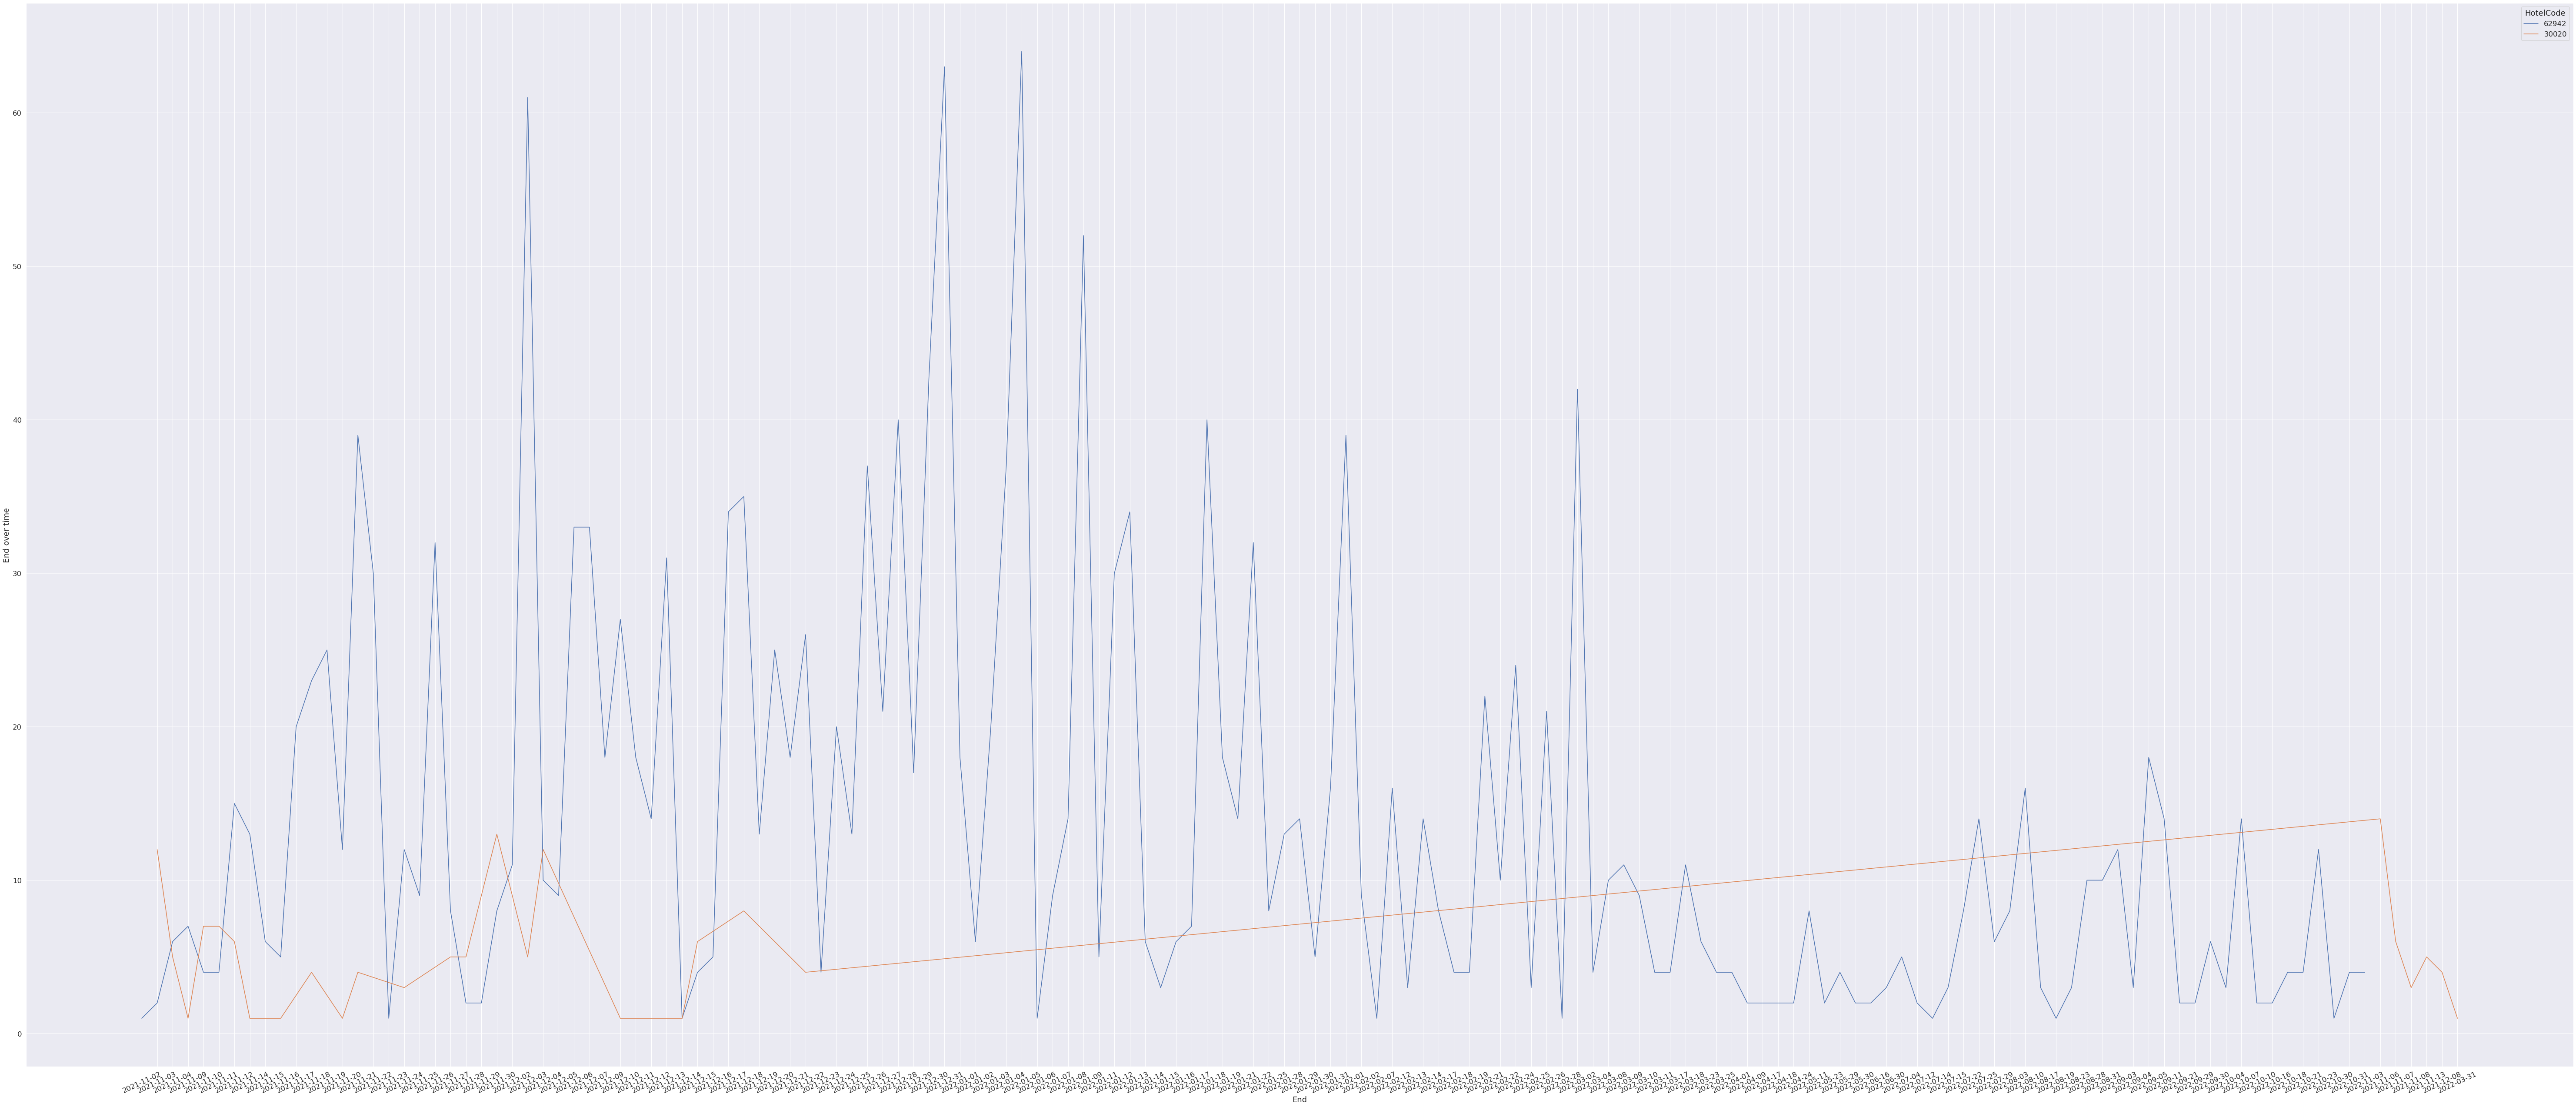

In [34]:
df3 =pd.DataFrame(hc1.groupby("End")["X-Correlation-ID"].count())
df4 =pd.DataFrame(hc2.groupby("End")["X-Correlation-ID"].count())
sns.set(font_scale = 1.5, rc={"figure.figsize":(105,45)})
sns.lineplot(x=df3.index.sort_values(), y=df3["X-Correlation-ID"],data=df3)
sns.lineplot(x=df4.index.sort_values(), y=df4["X-Correlation-ID"],data=df4)
plt.legend(title='HotelCode', loc='upper right', labels=["62942", "30020"])
plt.ylabel("End over time")
plt.xticks(rotation = 25)
plt.show()